In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv('boston.csv')

In [6]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [7]:
print("Null Values in Dataset:")
print(df.isnull().sum())

Null Values in Dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [8]:
if 'TARGET' not in df.columns:
    print("No 'TARGET' column found. Please check your dataset.")
else:
    print("TARGET column found!")

No 'TARGET' column found. Please check your dataset.


In [9]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [11]:
X = df.drop(columns=['MEDV']) 
y = df['MEDV']

In [12]:
z_scores = np.abs(stats.zscore(X))
outliers = (z_scores > 3) 
df_no_outliers = df[~np.any(outliers, axis=1)] 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    df_no_outliers.drop(columns=['MEDV']),
    df_no_outliers['MEDV'],
    test_size=0.2,
    random_state=42
)

In [14]:
model_with_outliers = LinearRegression()
model_with_outliers.fit(X_train, y_train)

y_pred_with_outliers = model_with_outliers.predict(X_test)
mse_with_outliers = mean_squared_error(y_test, y_pred_with_outliers)
r2_with_outliers = r2_score(y_test, y_pred_with_outliers)
rmse_with_outliers = np.sqrt(mse_with_outliers)

In [15]:
print("With Outliers:")
print(f'MSE: {mse_with_outliers}')
print(f'R²: {r2_with_outliers}')
print(f'RMSE: {rmse_with_outliers}')


With Outliers:
MSE: 24.291119474973538
R²: 0.6687594935356317
RMSE: 4.928602182665339


In [16]:
model_without_outliers = LinearRegression()
model_without_outliers.fit(X_train_no_outliers, y_train_no_outliers)

y_pred_without_outliers = model_without_outliers.predict(X_test_no_outliers)
mse_without_outliers = mean_squared_error(y_test_no_outliers, y_pred_without_outliers)
r2_without_outliers = r2_score(y_test_no_outliers, y_pred_without_outliers)
rmse_without_outliers = np.sqrt(mse_without_outliers)

In [17]:
print("\nWithout Outliers:")
print(f'MSE: {mse_without_outliers}')
print(f'R²: {r2_without_outliers}')
print(f'RMSE: {rmse_without_outliers}')


Without Outliers:
MSE: 10.621445730673042
R²: 0.7761172997388456
RMSE: 3.259055956971749


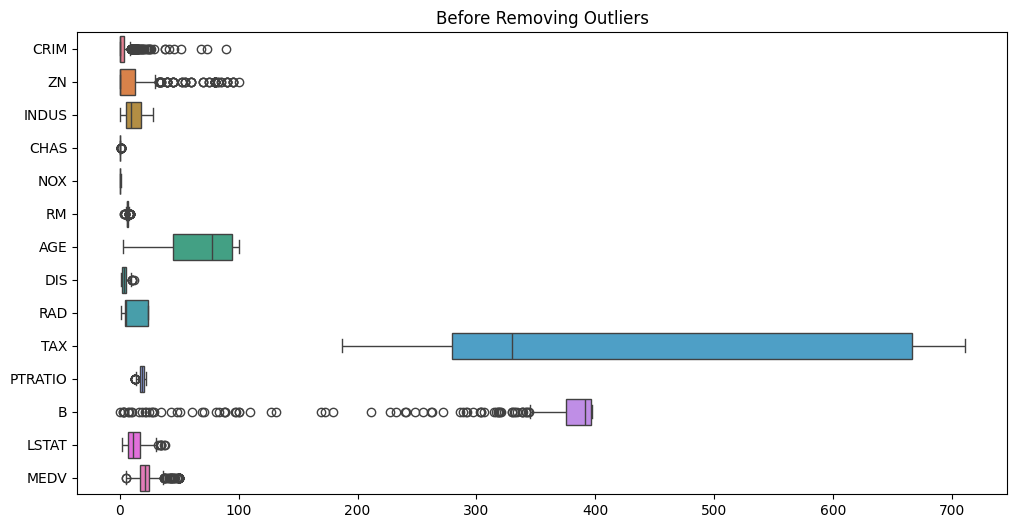

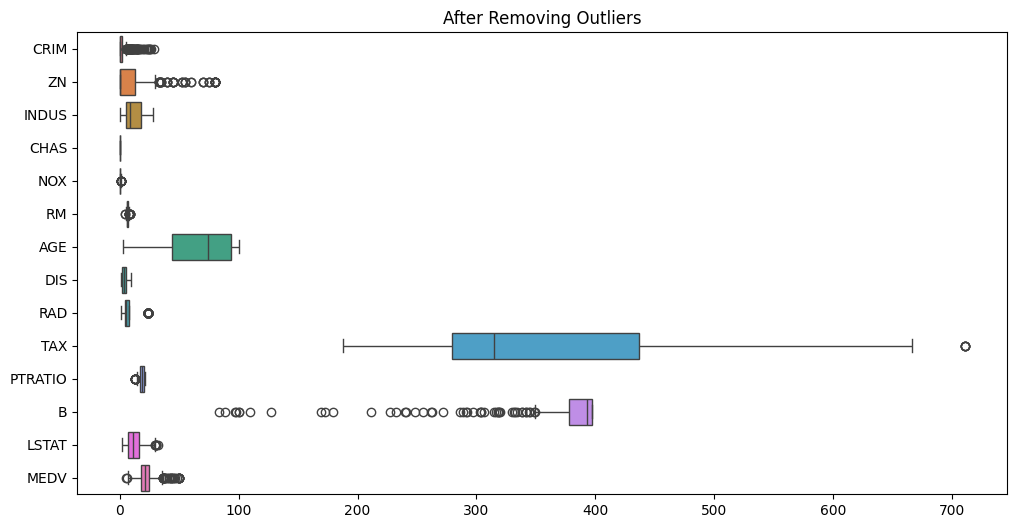

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Before Removing Outliers")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, orient="h")
plt.title("After Removing Outliers")
plt.show()

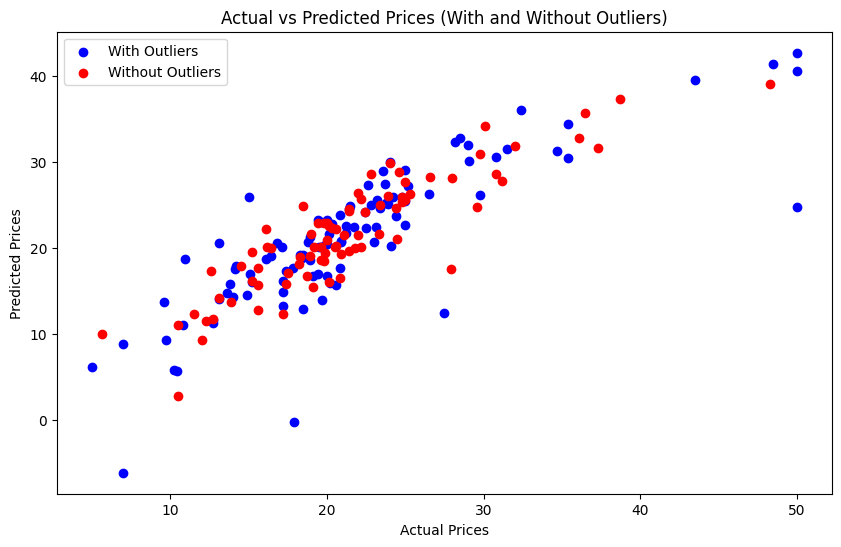

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_with_outliers, color='blue', label='With Outliers')
plt.scatter(y_test_no_outliers, y_pred_without_outliers, color='red', label='Without Outliers')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Actual vs Predicted Prices (With and Without Outliers)')
plt.show()